# Part I: Analyzing Transactions
## A store is interested in determining relationships between items purchased from its Stationary and Health and Beauty Aids departments. They wish to conduct a market basket analysis of items purchased from these departments. transactions.csv contains information on 200,000 transactions made over a three-month period. The file has two columns – the transaction id (Transaction) and the product purchased (Product), and contains over 400,000 rows (as each row involves a single product, transactions involving multiple products span multiple rows). Seventeen products are represented in the data set: bar soap, bows, candy bars, deodorant, greeting cards, magazines, markers, pain relievers, pencils, pens, perfume, photo processing, prescription medications, shampoo, toothbrushes, toothpaste, and wrapping paper.

In [ ]:
import os
import numpy as np
import pandas as pd

In [5]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.3 MB/s eta 0:00:0000:0100:01


In [6]:
from mlxtend.frequent_patterns import apriori, association_rules

<hr style="border:2px solid black">
<b>make sure the directory is correct</b>
<hr style="border:2px solid black">

In [7]:
os.getcwd()

'/Users/medal/Documents/BUAN6383'

<hr style="border:2px solid black">
<b>Read in file</b>
<hr style="border:2px solid black">

In [9]:
OriginalData = pd.read_csv('transactions.csv')
OriginalData.head()

,Transaction,Product
0,12359,Candy Bar
1,12362,Pain Reliever
2,12362,Pain Reliever
3,12365,Toothpaste
4,12371,Bow


## Q1: Read in the data and generate a file in which every row represents a transaction, with True identifying items that were part of that transaction, and False identifying items that were not

In [22]:
Transactions = OriginalData.groupby('Transaction')['Product'].apply(list).reset_index(name='Products')
Transactions

,Transaction,Products
0,12359,[Candy Bar]
1,12362,"[Pain Reliever, Pain Reliever]"
2,12365,[Toothpaste]
3,12371,[Bow]
4,12380,[Greeting Cards]
...,...,...
199995,1221845,"[Photo Processing, Magazine, Magazine, Magazin..."
199996,1221854,[Toothpaste]
199997,1221857,"[Candy Bar, Candy Bar]"
199998,1221863,"[Candy Bar, Greeting Cards, Toothpaste, Toothp..."


In [23]:
TMatrix = pd.get_dummies(Transactions['Products'].explode()).groupby(Transactions['Transaction']).max()

In [28]:
TMatrix = TMatrix.astype(bool)
TMatrix

,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
Transaction,,,,,,,,,,,,,,,,,
12359,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12362,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
12365,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
12371,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12380,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221845,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False
1221854,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1221857,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
TMatrix.to_csv('group03transactions01.csv', index=False)
TMatrix.head()

,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
Transaction,,,,,,,,,,,,,,,,,
12359,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12362,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
12365,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
12371,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12380,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


## Q2: Identify the frequent itemsets using a minimum support threshold of 1%. How many itemsets are frequent?

In [33]:
fi = apriori(TMatrix, min_support = 0.01, use_colnames = True)
fi

,support,itemsets
0,0.054645,(Bow)
1,0.171005,(Candy Bar)
2,0.146885,(Greeting Cards)
3,0.241305,(Magazine)
4,0.026700,(Pain Reliever)
5,0.134925,(Pencils)
6,0.143575,(Pens)
7,0.089960,(Perfume)
8,0.058480,(Photo Processing)
9,0.014505,(Prescription Med)


## Q3.Identify all association rules with a minimum confidence of 10%. How many rules are generated?

In [35]:
rules = association_rules(fi, metric="confidence", min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877,0.714499
1,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755,0.724232
2,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.043660,0.297239,1.738191,0.018542,1.179626,0.497810
3,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.043660,0.255314,1.738191,0.018542,1.145604,0.512294
4,(Candy Bar),(Magazine),0.171005,0.241305,0.040535,0.237040,0.982325,-0.000729,0.994410,-0.021244
5,(Magazine),(Candy Bar),0.241305,0.171005,0.040535,0.167982,0.982325,-0.000729,0.996367,-0.023167
6,(Pencils),(Candy Bar),0.134925,0.171005,0.033015,0.244691,1.430903,0.009942,1.097558,0.348109
7,(Candy Bar),(Pencils),0.171005,0.134925,0.033015,0.193065,1.430903,0.009942,1.072050,0.363260
8,(Candy Bar),(Toothpaste),0.171005,0.160425,0.039780,0.232625,1.450053,0.012347,1.094087,0.374393
9,(Toothpaste),(Candy Bar),0.160425,0.171005,0.039780,0.247966,1.450053,0.012347,1.102338,0.369675


49 Rules

## Q4.Which rules have the highest lift? Using the results from the previous questions, show exactly how this lift value was calculated for one of the rules with highest lift.

In [37]:
rules2 = rules.sort_values(['lift', 'confidence'], ascending =[False, False])
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(Perfume),(Toothbrush),0.089960,0.067350,0.021820,0.242552,3.601370,0.015761,1.231306,0.793732
27,(Toothbrush),(Perfume),0.067350,0.089960,0.021820,0.323979,3.601370,0.015761,1.346172,0.774490
0,(Bow),(Toothbrush),0.054645,0.067350,0.011340,0.207521,3.081236,0.007660,1.176877,0.714499
1,(Toothbrush),(Bow),0.067350,0.054645,0.011340,0.168374,3.081236,0.007660,1.136755,0.724232
30,"(Candy Bar, Magazine)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,0.669879
31,(Greeting Cards),"(Candy Bar, Magazine)",0.146885,0.040535,0.016665,0.113456,2.798966,0.010711,1.082253,0.753386
42,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947,0.647160
29,"(Greeting Cards, Magazine)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344,0.650802
49,"(Magazine, Toothpaste)",(Greeting Cards),0.031665,0.146885,0.011945,0.377230,2.568202,0.007294,1.369873,0.630590
40,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810,0.625124


## Q5.For the same rule, show how leverage and conviction were obtained.


In [39]:
rules3 = rules.sort_values('conviction', ascending =[False]).head(4)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
42,"(Pencils, Toothpaste)",(Candy Bar),0.024560,0.171005,0.011390,0.463762,2.711980,0.007190,1.545947,0.647160
29,"(Greeting Cards, Magazine)",(Candy Bar),0.036335,0.171005,0.016665,0.458649,2.682078,0.010452,1.531344,0.650802
40,"(Magazine, Toothpaste)",(Candy Bar),0.031665,0.171005,0.013720,0.433286,2.533762,0.008305,1.462810,0.625124
30,"(Candy Bar, Magazine)",(Greeting Cards),0.040535,0.146885,0.016665,0.411126,2.798966,0.010711,1.448723,0.669879


In [40]:
rules4 = rules.sort_values('leverage', ascending =[False]).head(4)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.04366,0.297239,1.738191,0.018542,1.179626,0.497810
3,(Candy Bar),(Greeting Cards),0.171005,0.146885,0.04366,0.255314,1.738191,0.018542,1.145604,0.512294
26,(Perfume),(Toothbrush),0.089960,0.067350,0.02182,0.242552,3.601370,0.015761,1.231306,0.793732
27,(Toothbrush),(Perfume),0.067350,0.089960,0.02182,0.323979,3.601370,0.015761,1.346172,0.774490


## Q6.Interpret and discuss the 5 rules with
## a. the highest confidence,
## b. the highest lift,
## c. the highest leverage, and
## d. the highest conviction.
## If there are more than five meeting the required criterion, pick any five. Are any of these surprising? Comment on the extent of their redundancy and utility

In [45]:
MaxConfid = rules.sort_values('confidence', ascending =[False]).head(1)
MaxConfid

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
42,"(Pencils, Toothpaste)",(Candy Bar),0.02456,0.171005,0.01139,0.463762,2.71198,0.00719,1.545947,0.64716


In [46]:
Maxlift = rules.sort_values('lift', ascending =[False]).head(1)
Maxlift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(Perfume),(Toothbrush),0.08996,0.06735,0.02182,0.242552,3.60137,0.015761,1.231306,0.793732


In [47]:
MaxLev = rules.sort_values('leverage', ascending =[False]).head(1)
MaxLev

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Greeting Cards),(Candy Bar),0.146885,0.171005,0.04366,0.297239,1.738191,0.018542,1.179626,0.49781


In [49]:
MaxConvic = rules.sort_values('conviction', ascending =[False]).head(1)
MaxConvic

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
42,"(Pencils, Toothpaste)",(Candy Bar),0.02456,0.171005,0.01139,0.463762,2.71198,0.00719,1.545947,0.64716


# Q2. Part II: Clustering Customers
## A bank in the U.K. is interested in identifying categories of customers for potential future promotions. Data collected on 600 customers is in bankcustomers.csv

In [55]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as km
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder

In [67]:
Bankcustomers = pd.read_csv('bankcustomers.csv')
Bankcustomers

,Unnamed: 0,id,age,sex,region,income,married,children,car,savings,checking,mortgage,pep
0,0,ID12101,48,1,1,17546.00,0,1,0,0,0,0,1
1,1,ID12102,40,0,2,30085.10,1,3,1,0,1,1,0
2,2,ID12103,51,1,1,16575.40,1,0,1,1,1,0,0
3,3,ID12104,23,1,2,20375.40,1,3,0,0,1,0,0
4,4,ID12105,57,1,3,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,ID12696,61,1,1,47025.00,0,2,1,1,1,1,0
596,596,ID12697,30,1,1,9672.25,1,0,1,1,1,0,0
597,597,ID12698,31,1,2,15976.30,1,0,1,1,0,0,1
598,598,ID12699,29,0,1,14711.80,1,0,0,1,0,1,0


# Question 1. Notice that region is categorical; we need to do what is referred to as “one-hot encoding” – convert it into separate (binary) variables, one for each possible value of region. So you will need to create 4 new variables, corresponding to inner city, town, rural, and suburban (a 1 in a column would represent being from the associated region). You can do this either explicitly by writing your own code, or by using the OneHotEncoder option availablein sklearn (preprocessing). Read in the data, create the four new columns, and drop region.

In [64]:
encoder = OneHotEncoder()
encoded_regions = encoder.fit_transform(Bankcustomers[['region']])
encoded_regions

<600x4 sparse matrix of type '<class 'numpy.float64'>'
	with 600 stored elements in Compressed Sparse Row format>

In [66]:
encoded_regions_df = pd.DataFrame(encoded_regions.toarray(), columns=encoder.get_feature_names_out(['region']))
encoded_regions_df

,region_1,region_2,region_3,region_4
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
595,1.0,0.0,0.0,0.0
596,1.0,0.0,0.0,0.0
597,0.0,1.0,0.0,0.0
598,1.0,0.0,0.0,0.0


In [69]:
Bankcustomers = pd.concat([Bankcustomers, encoded_regions_df], axis=1)

In [72]:
Bankcustomers.drop('region', axis=1, inplace=True)

In [73]:
Bankcustomers.head()

,Unnamed: 0,id,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4
0,0,ID12101,48,1,17546.0,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0
1,1,ID12102,40,0,30085.1,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0
2,2,ID12103,51,1,16575.4,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0
3,3,ID12104,23,1,20375.4,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0
4,4,ID12105,57,1,50576.3,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0


In [84]:
BCcopy = Bankcustomers.copy()
BCcopy

,Unnamed: 0,id,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4
0,0,ID12101,48,1,17546.00,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0
1,1,ID12102,40,0,30085.10,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0
2,2,ID12103,51,1,16575.40,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0
3,3,ID12104,23,1,20375.40,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0
4,4,ID12105,57,1,50576.30,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,ID12696,61,1,47025.00,0,2,1,1,1,1,0,1.0,0.0,0.0,0.0
596,596,ID12697,30,1,9672.25,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0
597,597,ID12698,31,1,15976.30,1,0,1,1,0,0,1,0.0,1.0,0.0,0.0
598,598,ID12699,29,0,14711.80,1,0,0,1,0,1,0,1.0,0.0,0.0,0.0


## Q2.Apply hierarchical clustering (with Euclidian distance as the measure of distance) to the dataset using (i) centroid linkage, (ii) single linkage, (iii) complete linkage, (iv) average linkage, and (v) Ward linkage. For each of these, comment on whether you see any clear clusters, and how many clusters you would recommend (and why). Across all the linkage approaches tried, which one has worked best in this example (provide your reasoning)? What are some distinguishing characteristics of each cluster?

In [75]:
BCcopy.isna().sum()

Unnamed: 0    0
id            0
age           0
sex           0
income        0
married       0
children      0
car           0
savings       0
checking      0
mortgage      0
pep           0
region_1      0
region_2      0
region_3      0
region_4      0
dtype: int64

In [77]:
len(BCcopy.id)

600

In [86]:
BCcopynew = BCcopy.drop('id', axis=1)
BCcopynew

,Unnamed: 0,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4
0,0,48,1,17546.00,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0
1,1,40,0,30085.10,1,3,1,0,1,1,0,0.0,1.0,0.0,0.0
2,2,51,1,16575.40,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0
3,3,23,1,20375.40,1,3,0,0,1,0,0,0.0,1.0,0.0,0.0
4,4,57,1,50576.30,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,61,1,47025.00,0,2,1,1,1,1,0,1.0,0.0,0.0,0.0
596,596,30,1,9672.25,1,0,1,1,1,0,0,1.0,0.0,0.0,0.0
597,597,31,1,15976.30,1,0,1,1,0,0,1,0.0,1.0,0.0,0.0
598,598,29,0,14711.80,1,0,0,1,0,1,0,1.0,0.0,0.0,0.0


In [87]:
nbb = normalize(BCcopynew)
nbb = pd.DataFrame(nbb, columns=BCcopynew.columns)
nbb

,Unnamed: 0,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4
0,0.000000,0.002736,0.000057,0.999996,0.000000,0.000057,0.000000,0.000000,0.000000,0.000000,0.000057,0.000057,0.000000,0.00000,0.0
1,0.000033,0.001330,0.000000,0.999999,0.000033,0.000100,0.000033,0.000000,0.000033,0.000033,0.000000,0.000000,0.000033,0.00000,0.0
2,0.000121,0.003077,0.000060,0.999995,0.000060,0.000000,0.000060,0.000060,0.000060,0.000000,0.000000,0.000060,0.000000,0.00000,0.0
3,0.000147,0.001129,0.000049,0.999999,0.000049,0.000147,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000,0.000049,0.00000,0.0
4,0.000079,0.001127,0.000020,0.999999,0.000020,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.00002,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.012652,0.001297,0.000021,0.999919,0.000000,0.000043,0.000021,0.000021,0.000021,0.000021,0.000000,0.000021,0.000000,0.00000,0.0
596,0.061503,0.003096,0.000103,0.998102,0.000103,0.000000,0.000103,0.000103,0.000103,0.000000,0.000000,0.000103,0.000000,0.00000,0.0
597,0.037342,0.001939,0.000063,0.999301,0.000063,0.000000,0.000063,0.000063,0.000000,0.000000,0.000063,0.000000,0.000063,0.00000,0.0
598,0.040614,0.001970,0.000000,0.999173,0.000068,0.000000,0.000000,0.000068,0.000000,0.000068,0.000000,0.000068,0.000000,0.00000,0.0


In [90]:
import scipy.cluster.hierarchy as hc
clstr1 = hc.linkage(nbb, method='centroid', metric="euclidean")

In [91]:
clstr1[0]

array([1.70000000e+02, 2.06000000e+02, 2.94113892e-05, 2.00000000e+00])

## Hierarchical Clustering: Centroid Linkage draw the dentrogram

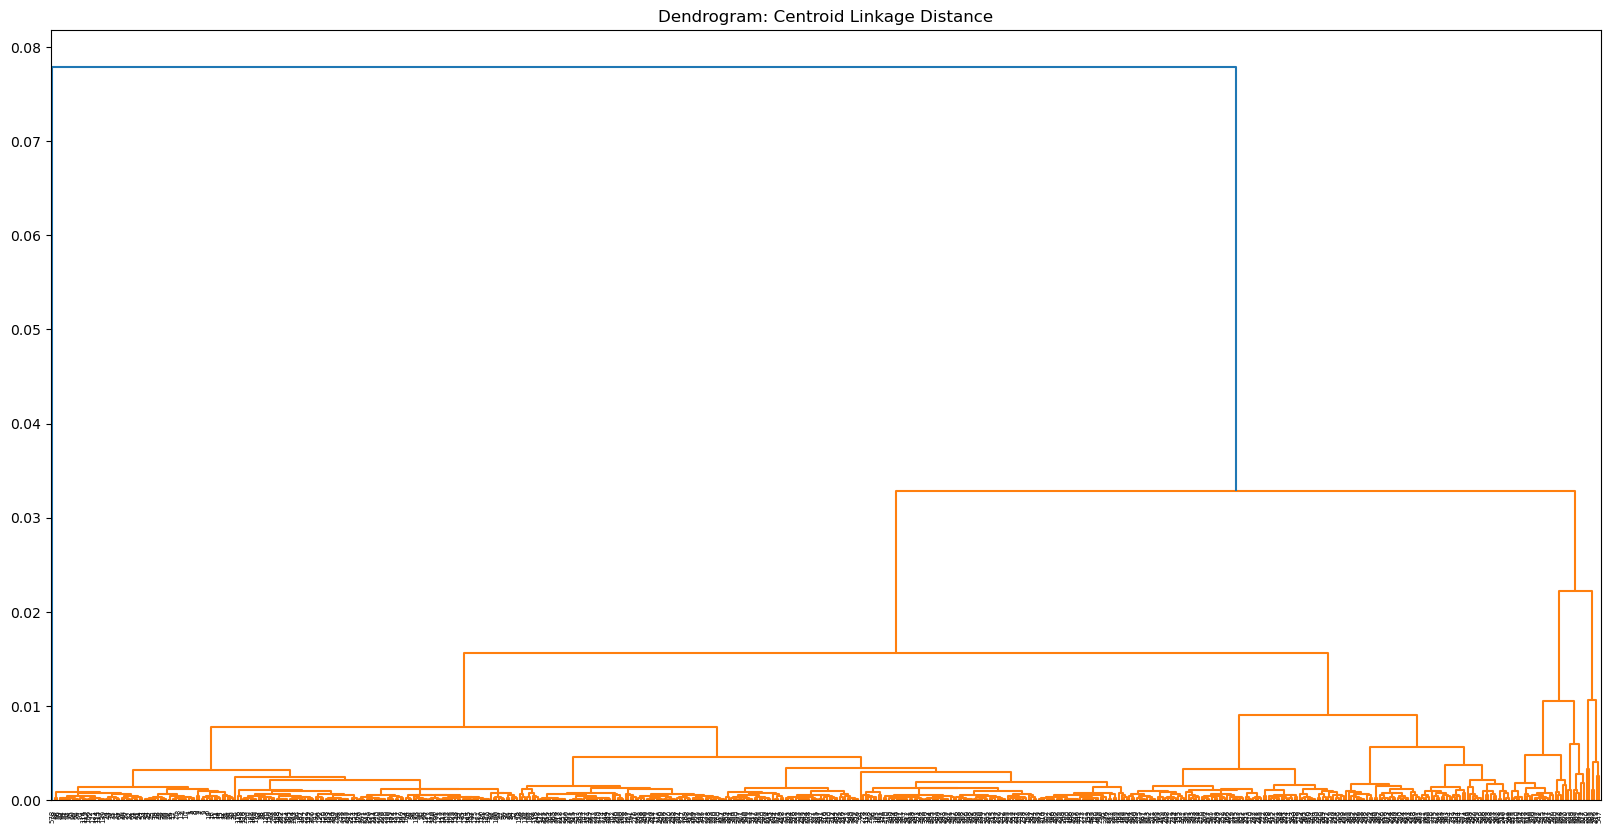

In [92]:
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Centroid Linkage Distance")
dgnbb1 = hc.dendrogram(clstr1)
plt.show()

## Maximum distance between merged clusters


In [94]:
max(clstr1[:,2])

0.0778989676276874

## Default threshold for cluster formation

In [96]:
0.7*max(clstr1[:,2])

0.05452927733938118

## 2 clear clusters. I would recommend 4 clusters at 1000 Euclidian distance because the categories for promotion are likely to make more sense if they have shorter distance between clusters. Having 4 clusters compared to 2 allows for promotions to be more specific. 
i.	Characteristics: Evenly distributed clusters

## Hierarchical Clustering: Single (Nearest) Linkage draw the dentrogram

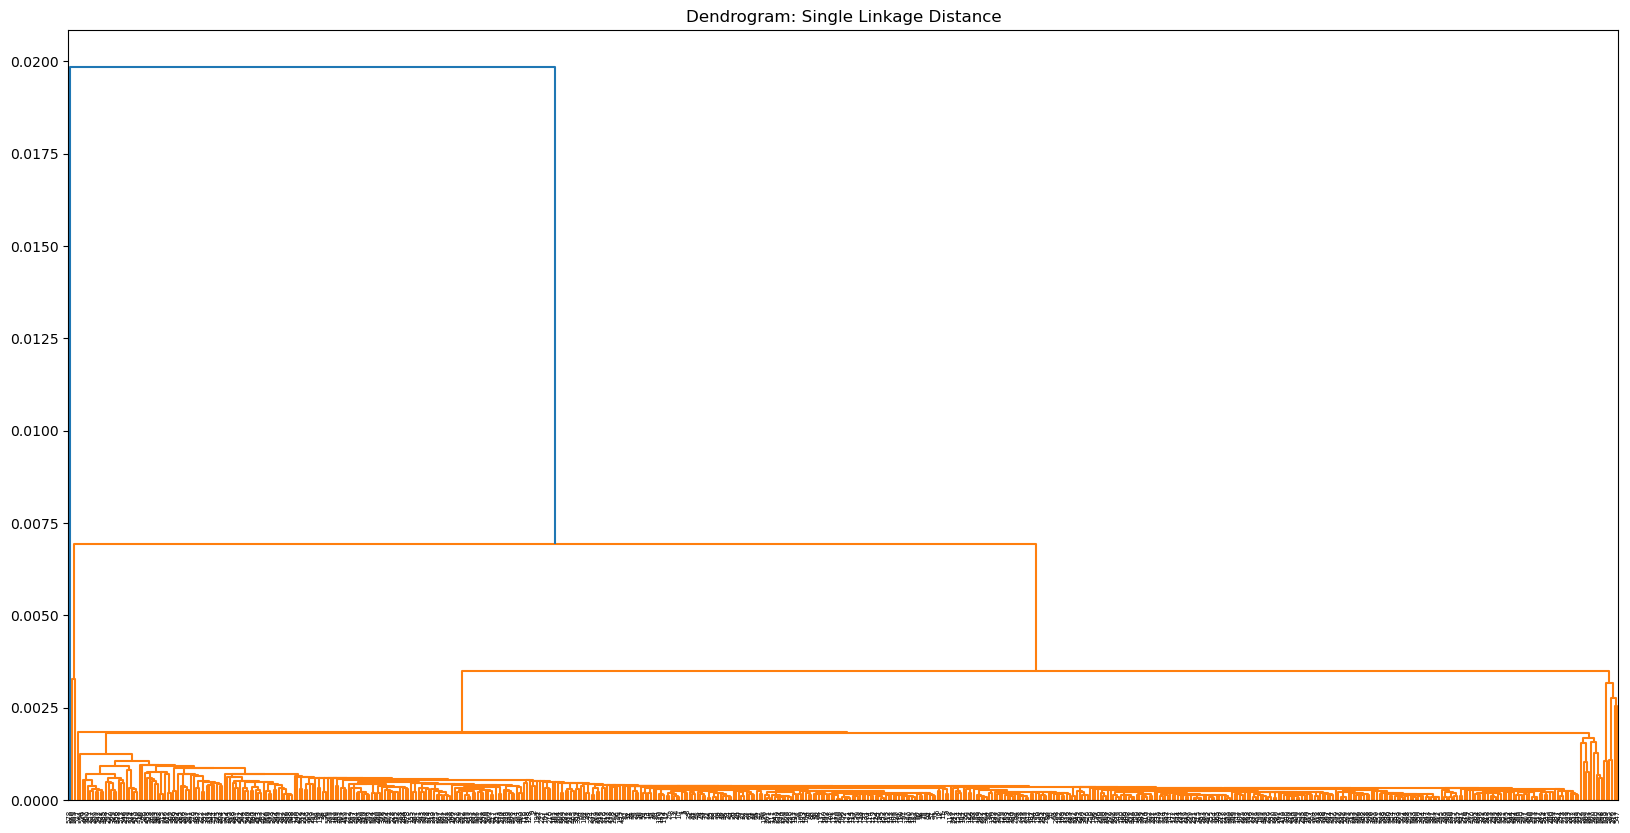

In [97]:
clstr2 = hc.linkage(nbb, method='single', metric="euclidean")
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Single Linkage Distance")
dgnbb2 = hc.dendrogram(clstr2)

## 3 clear clusters. I would recommend 5 clusters at 900 Euclidian distance because the red cluster shown could easily be divided into 2 for a more accurate cluster category.
i.	Characteristics: Noisy and elongated clusters

# Hierarchical Clustering: Complete Linkage draw the dentrogram


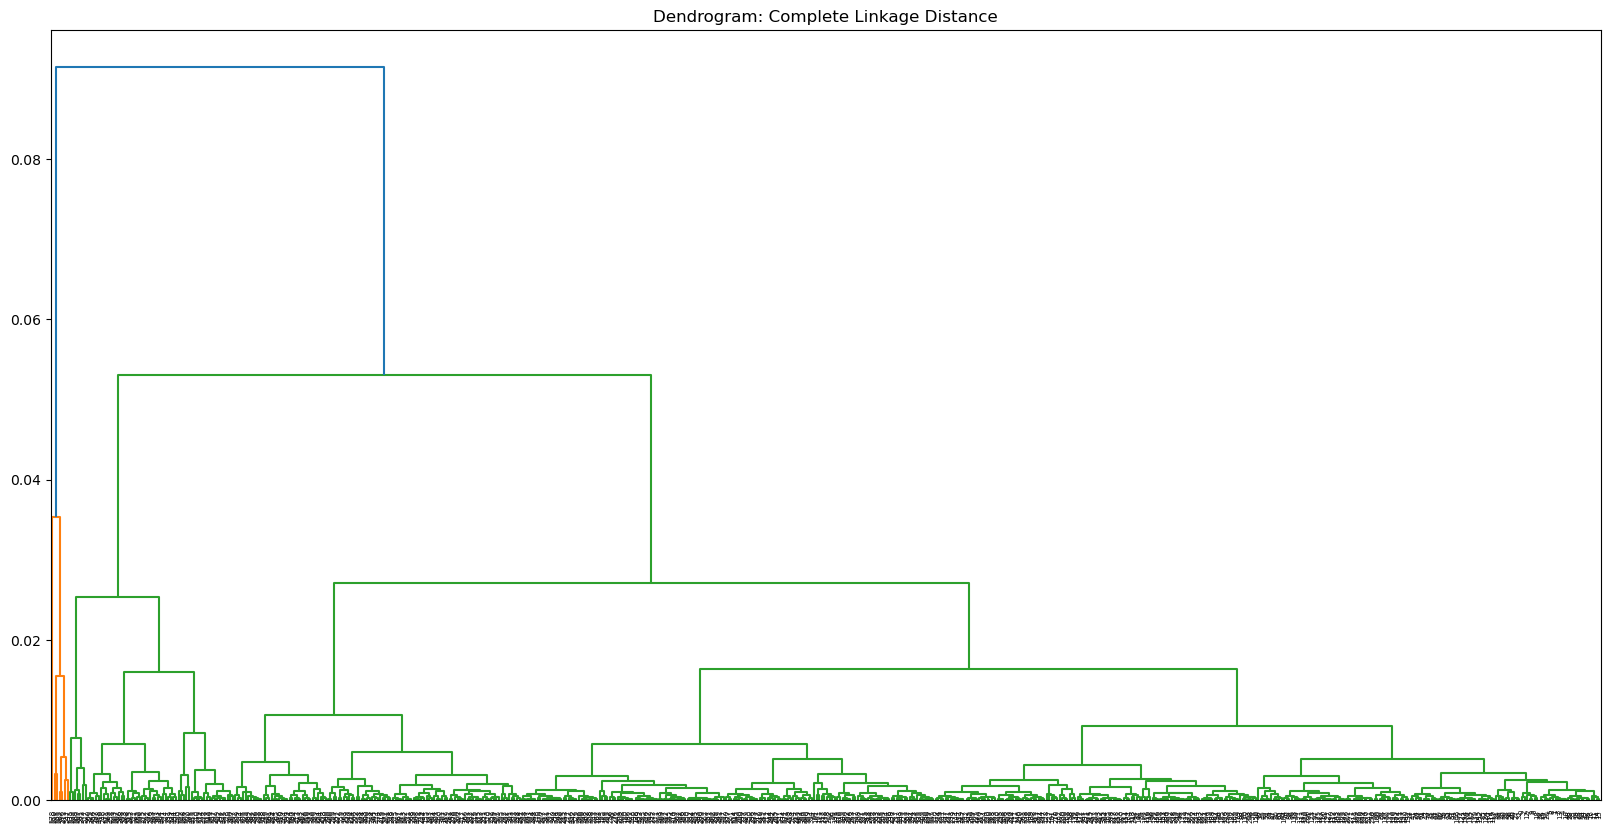

In [98]:
clstr3 = hc.linkage(nbb, method='complete', metric="euclidean")
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Complete Linkage Distance")
dgnbb3 = hc.dendrogram(clstr3)

2 clear clusters. I would recommend 3 clusters because the distance between the large 2 green clusters is similar to the distance of the orange cluster and in comparison would be much better represented as 3 clusters. 
i.	Characteristics: Evenly distributed clusters, less noisy compared to single

# Hierarchical Clustering: Average Linkage draw the dentrogram


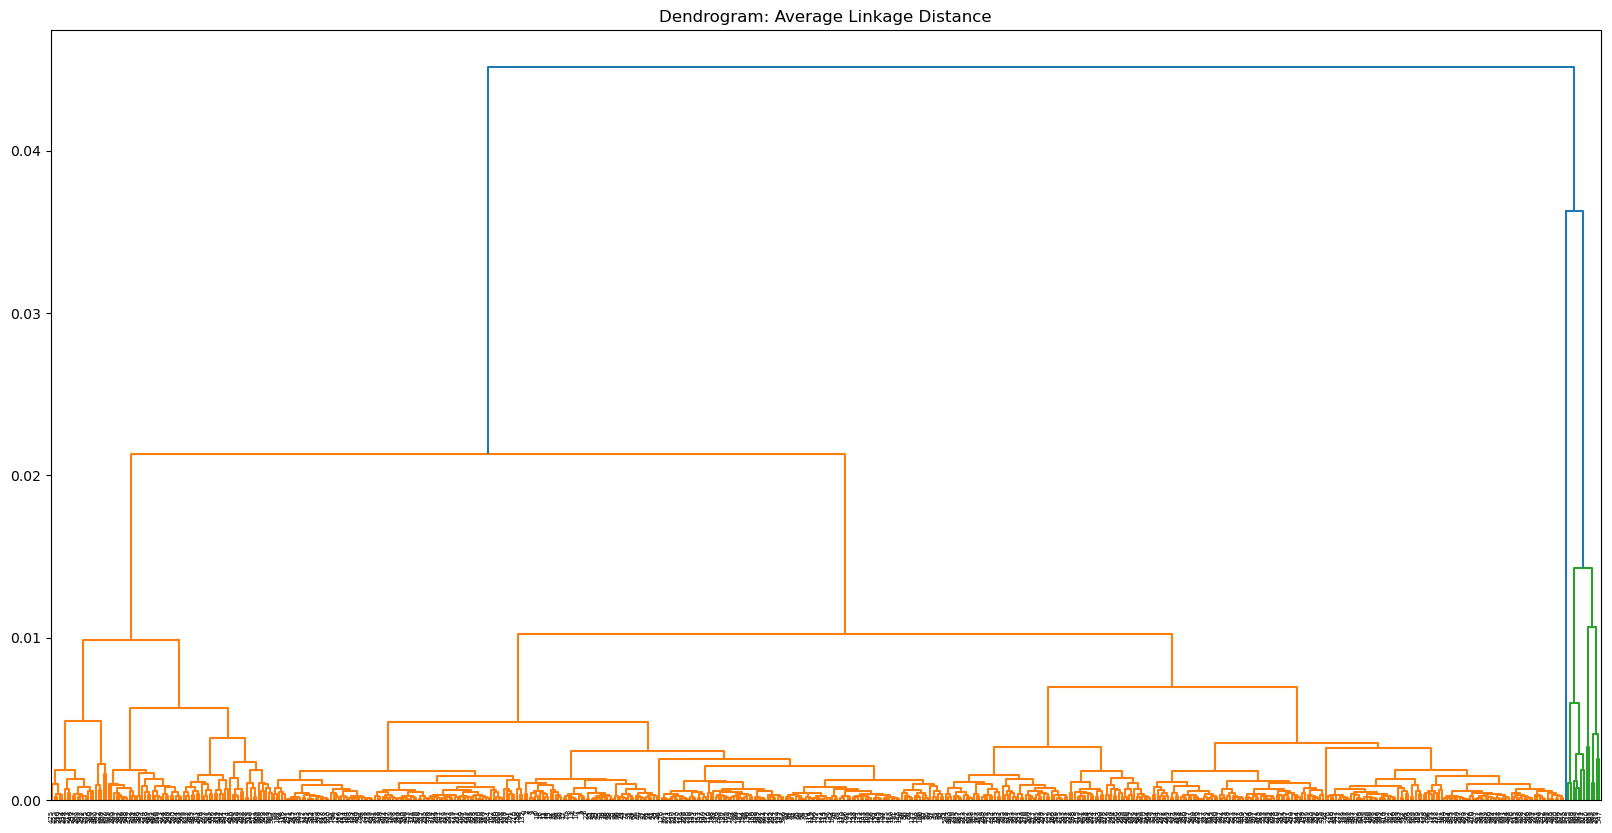

In [100]:
clstr4 = hc.linkage(nbb, method='average', metric="euclidean")
plt.figure(figsize=(20, 10))  
plt.title("Dendrogram: Average Linkage Distance")
dgnbb4 = hc.dendrogram(clstr4)

## Average Linkage – 2 clear clusters. I would recommend 4 clusters at 1000 Euclidian distance because the average distance is much more similar between the four clusters at that Euclidian distance compared to the 2 clusters at a higher distance. 
i.	Characteristics: More evenly distributed compared to complete linkage. 

# Hierarchical Clustering: Ward Linkage merge clusters based on the smallest increase in the Sum-of-Squares
draw the dentrogram


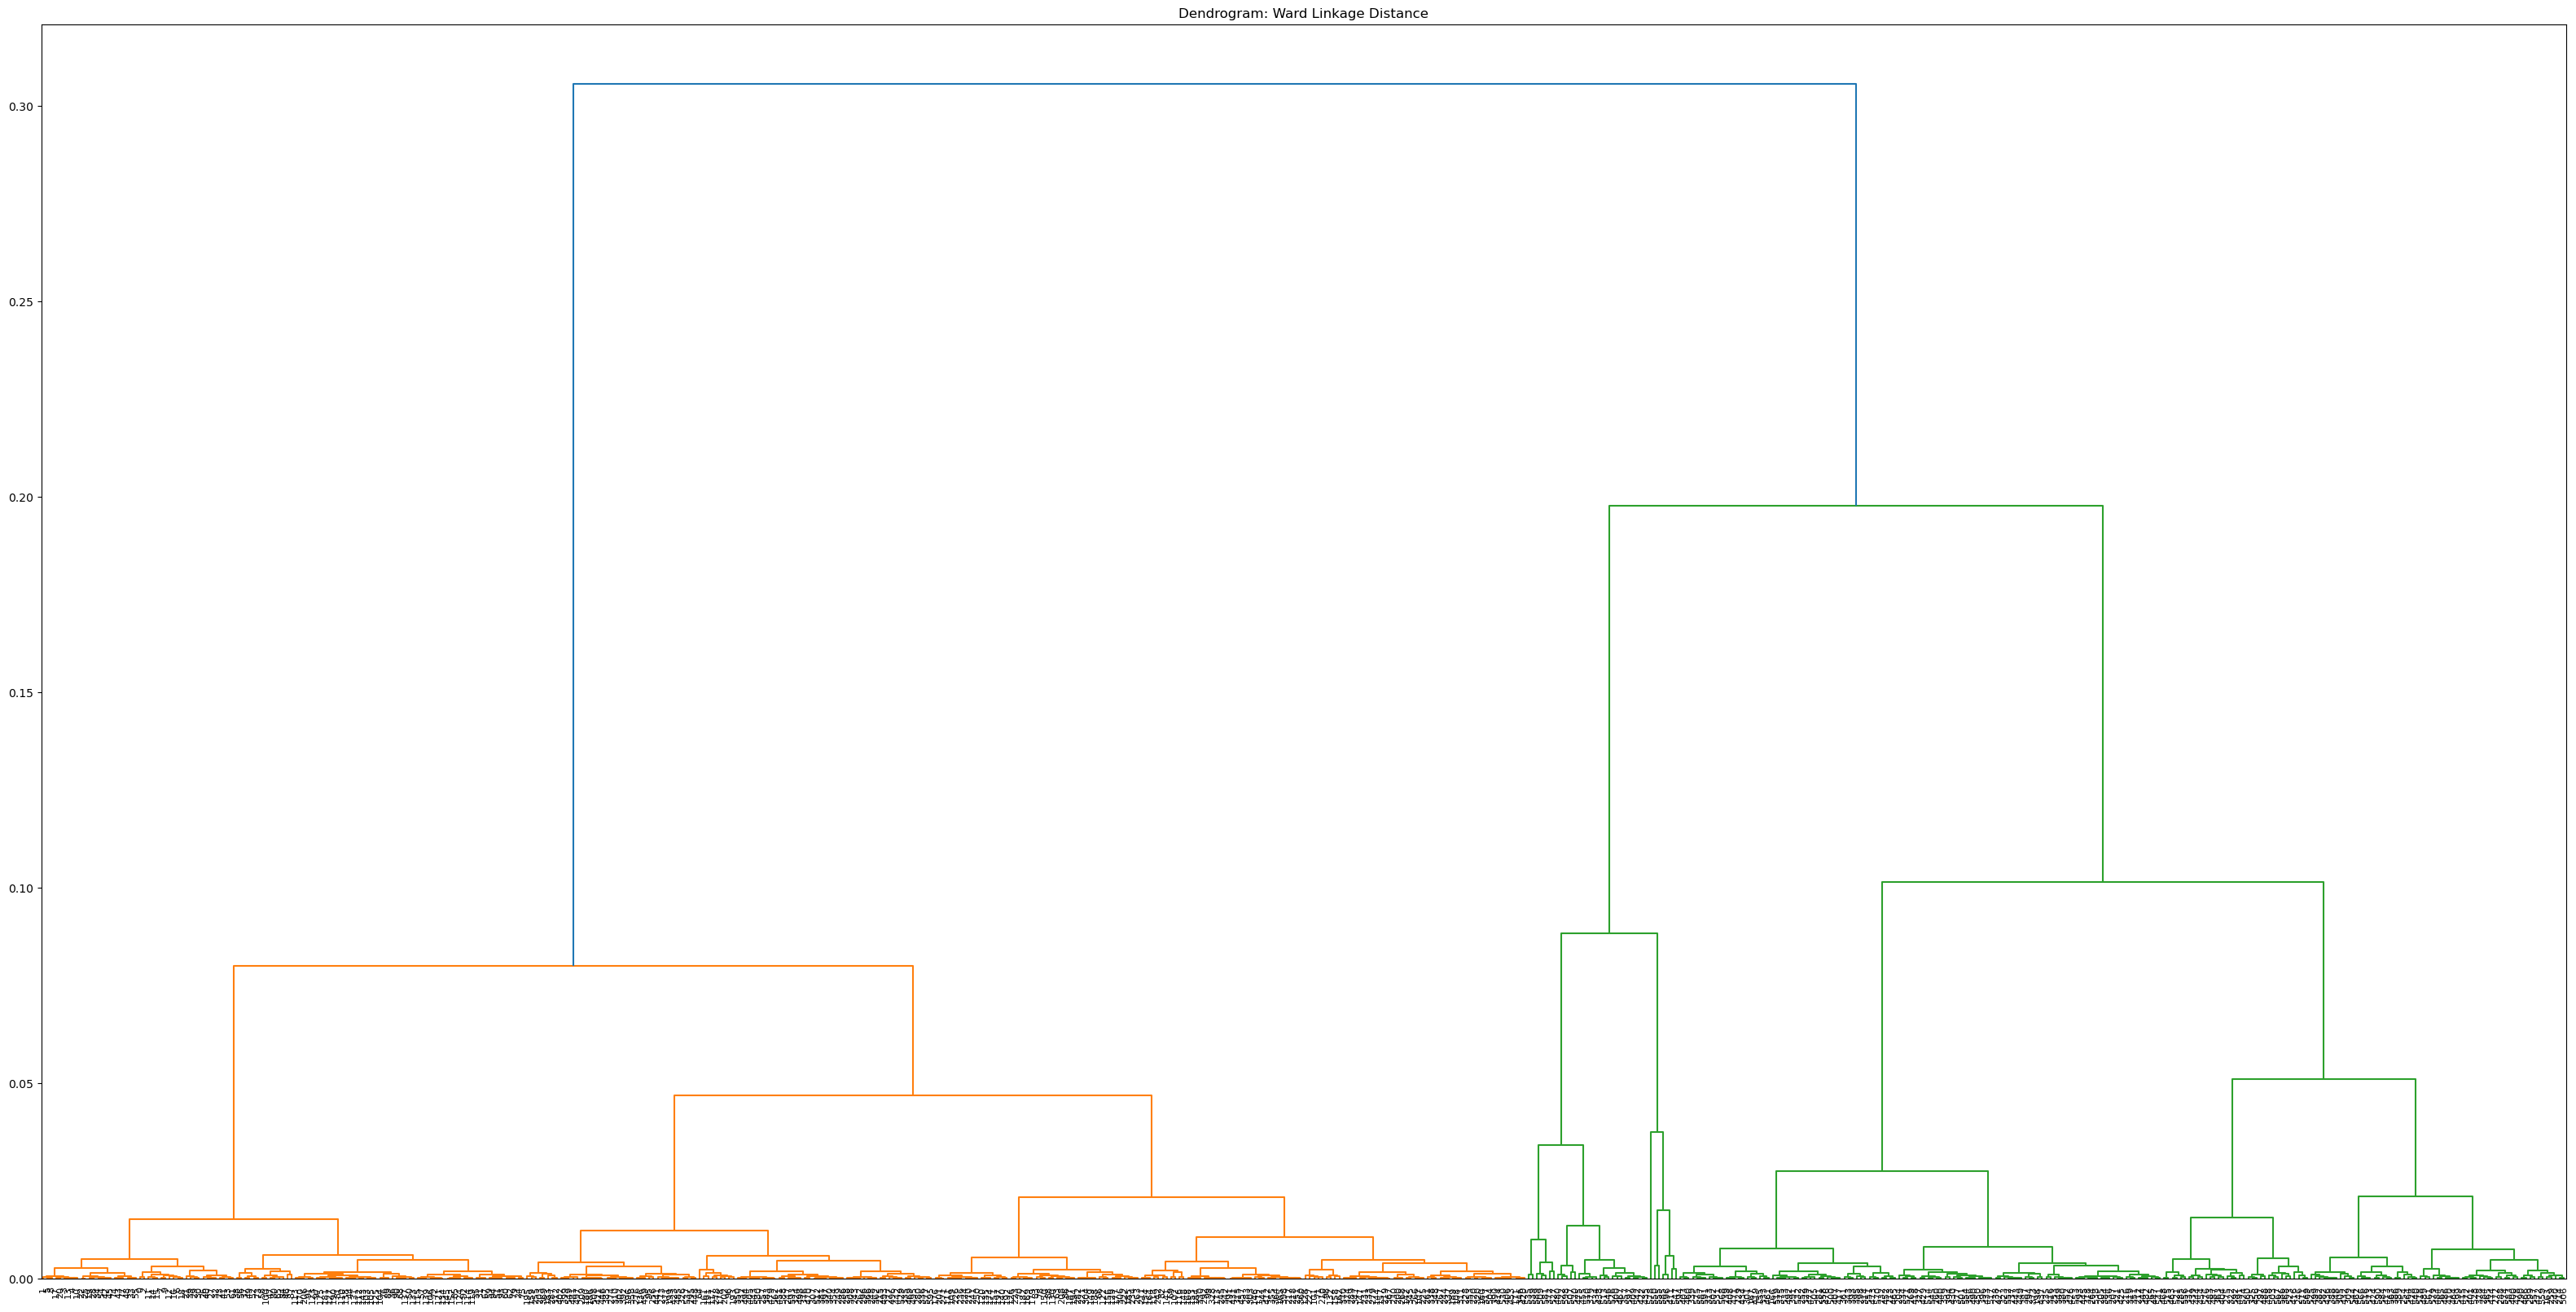

In [101]:
clstr5 = hc.linkage(nbb, method='ward', metric="euclidean")
plt.figure(figsize=(40, 20))  
plt.title("Dendrogram: Ward Linkage Distance")
dgnbb5 = hc.dendrogram(clstr5, leaf_rotation=90., leaf_font_size=8.)

## Ward Linkage – 2 clear clusters. I would recommend 4 clusters at 100000 Euclidian distance because the Euclidian distance of the four separate clusters is similar in comparison than the 2 clusters at 150000 Euclidian distance.  
i.	Characteristics: well balanced clusters with minimum variance compared to other clusters

## The one that would work best for our example is Ward linkage because it provides the least amount of variance between each cluster. 

# Q3.Apply k-means clustering to the dataset. Try different values of k (4, 5, 6, 7, and 8 at least); make sure you include the number of clusters you decided to use with hierarchical clustering. 


In [102]:
clstr2 = km(n_clusters=2, random_state=0) 
clstr2.fit(nbb)

/Users/medal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [103]:
clstr2.cluster_centers_

array([[8.85225947e-03, 1.61365278e-03, 1.88203345e-05, 9.99944686e-01,
        2.57028210e-05, 3.96309963e-05, 1.86308931e-05, 2.61282953e-05,
        2.98010011e-05, 1.36060906e-05, 1.68894335e-05, 1.87296056e-05,
        1.11654971e-05, 5.69220050e-06, 3.71752482e-06],
       [3.16391656e-02, 2.02637257e-03, 3.63465802e-05, 9.99430606e-01,
        4.55085874e-05, 6.97256286e-05, 3.28501640e-05, 4.34088869e-05,
        5.38989344e-05, 2.52325688e-05, 2.45036925e-05, 3.11448105e-05,
        2.08482395e-05, 1.10146768e-05, 7.78906086e-06]])

In [104]:
clusters2 = clstr2.labels_
clusters2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [105]:
nbb2 = nbb.copy()
nbb2['CLUSTER'] = clusters2.tolist()
nbb2

,Unnamed: 0,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4,CLUSTER
0,0.000000,0.002736,0.000057,0.999996,0.000000,0.000057,0.000000,0.000000,0.000000,0.000000,0.000057,0.000057,0.000000,0.00000,0.0,0
1,0.000033,0.001330,0.000000,0.999999,0.000033,0.000100,0.000033,0.000000,0.000033,0.000033,0.000000,0.000000,0.000033,0.00000,0.0,0
2,0.000121,0.003077,0.000060,0.999995,0.000060,0.000000,0.000060,0.000060,0.000060,0.000000,0.000000,0.000060,0.000000,0.00000,0.0,0
3,0.000147,0.001129,0.000049,0.999999,0.000049,0.000147,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000,0.000049,0.00000,0.0,0
4,0.000079,0.001127,0.000020,0.999999,0.000020,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.00002,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.012652,0.001297,0.000021,0.999919,0.000000,0.000043,0.000021,0.000021,0.000021,0.000021,0.000000,0.000021,0.000000,0.00000,0.0,0
596,0.061503,0.003096,0.000103,0.998102,0.000103,0.000000,0.000103,0.000103,0.000103,0.000000,0.000000,0.000103,0.000000,0.00000,0.0,1
597,0.037342,0.001939,0.000063,0.999301,0.000063,0.000000,0.000063,0.000063,0.000000,0.000000,0.000063,0.000000,0.000063,0.00000,0.0,1
598,0.040614,0.001970,0.000000,0.999173,0.000068,0.000000,0.000000,0.000068,0.000000,0.000068,0.000000,0.000068,0.000000,0.00000,0.0,1


In [106]:
nbb2['CLUSTER'].value_counts()

0    470
1    130
Name: CLUSTER, dtype: int64

In [107]:
nbb2Avg = nbb2.groupby('CLUSTER', as_index=False).mean()
nbb2Avg

,CLUSTER,Unnamed: 0,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4
0,0,0.008852,0.001614,0.000019,0.999945,0.000026,0.00004,0.000019,0.000026,0.000030,0.000014,0.000017,0.000019,0.000011,0.000006,0.000004
1,1,0.031639,0.002026,0.000036,0.999431,0.000046,0.00007,0.000033,0.000043,0.000054,0.000025,0.000025,0.000031,0.000021,0.000011,0.000008


<hr style="border:2px solid black">
<b>k-means with 3 Clusters
</b>
<hr style="border:2px solid black">

In [108]:
clstr3 = km(n_clusters=3, random_state=0) 
clstr3.fit(nbb)
print(clstr3.cluster_centers_)
clusters3 = clstr3.labels_
print(clusters3)
nbb3 = nbb.copy()
nbb3['CLUSTER'] = clusters3.tolist()
print(nbb3['CLUSTER'].value_counts())
nbb3Avg = nbb3.groupby('CLUSTER', as_index=False).mean()
nbb3Avg

[[1.96292046e-02 1.77571345e-03 2.56403375e-05 9.99793832e-01
  3.39210285e-05 4.29608484e-05 2.28693180e-05 2.88332073e-05
  3.60850358e-05 1.90296408e-05 2.18992734e-05 2.19489199e-05
  1.50627234e-05 8.55403192e-06 5.39280186e-06]
 [4.16793956e-02 2.24434236e-03 4.44848636e-05 9.99057285e-01
  5.11886201e-05 1.02179943e-04 4.17883669e-05 6.04571200e-05
  6.78412974e-05 3.24582381e-05 2.25857914e-05 4.19473315e-05
  2.23607352e-05 8.76289083e-06 1.39819940e-05]
 [6.42996900e-03 1.58243616e-03 1.76958467e-05 9.99971005e-01
  2.46799065e-05 3.95025968e-05 1.80748001e-05 2.58599371e-05
  2.95291845e-05 1.20962973e-05 1.61014323e-05 1.80575985e-05
  1.09204243e-05 5.62678203e-06 2.76259361e-06]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

/Users/medal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CLUSTER,Unnamed: 0,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4
0,0,0.019629,0.001776,0.000026,0.999794,0.000034,0.000043,0.000023,0.000029,0.000036,0.000019,0.000022,0.000022,0.000015,0.000009,0.000005
1,1,0.041679,0.002244,0.000044,0.999057,0.000051,0.000102,0.000042,0.000060,0.000068,0.000032,0.000023,0.000042,0.000022,0.000009,0.000014
2,2,0.006430,0.001582,0.000018,0.999971,0.000025,0.000040,0.000018,0.000026,0.000030,0.000012,0.000016,0.000018,0.000011,0.000006,0.000003


# k-means with 4 Clusters


In [109]:
clstr4 = km(n_clusters=4, random_state=0) 
clstr4.fit(nbb)
print(clstr4.cluster_centers_)
clusters4 = clstr4.labels_
print(clusters4)
nbb4 = nbb.copy()
nbb4['CLUSTER'] = clusters4.tolist()
print(nbb4['CLUSTER'].value_counts())
nbb4Avg = nbb4.groupby('CLUSTER', as_index=False).mean()
nbb4Avg

[[1.54796449e-02 1.71961537e-03 2.03416301e-05 9.99872183e-01
  2.94829611e-05 4.02242099e-05 2.02148163e-05 2.66670509e-05
  3.09870523e-05 1.80006422e-05 1.78979551e-05 2.06059146e-05
  1.37148155e-05 5.75692639e-06 5.31170625e-06]
 [3.08987910e-02 2.02127866e-03 3.77704166e-05 9.99506476e-01
  4.52490414e-05 7.32654419e-05 3.05646314e-05 4.20495617e-05
  5.16649670e-05 2.55564511e-05 2.65038317e-05 2.87607470e-05
  1.99333249e-05 1.23524306e-05 8.07467457e-06]
 [5.15019476e-03 1.55638361e-03 1.85225582e-05 9.99980968e-01
  2.40440704e-05 3.97225032e-05 1.78853691e-05 2.62256474e-05
  2.98429051e-05 1.06465942e-05 1.64168841e-05 1.78839957e-05
  1.01224916e-05 6.02945438e-06 2.57671212e-06]
 [5.78642024e-02 2.46895805e-03 4.77255825e-05 9.98245566e-01
  6.48706487e-05 1.01460839e-04 6.80455444e-05 7.85017793e-05
  1.00111176e-04 4.03907334e-05 2.25593459e-05 6.05988147e-05
  2.90429332e-05 6.36228809e-06 1.33055550e-05]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

/Users/medal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CLUSTER,Unnamed: 0,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4
0,0,0.015480,0.001720,0.000020,0.999872,0.000029,0.000040,0.000020,0.000027,0.000031,0.000018,0.000018,0.000021,0.000014,0.000006,0.000005
1,1,0.030899,0.002021,0.000038,0.999506,0.000045,0.000073,0.000031,0.000042,0.000052,0.000026,0.000027,0.000029,0.000020,0.000012,0.000008
2,2,0.005150,0.001556,0.000019,0.999981,0.000024,0.000040,0.000018,0.000026,0.000030,0.000011,0.000016,0.000018,0.000010,0.000006,0.000003
3,3,0.057864,0.002469,0.000048,0.998246,0.000065,0.000101,0.000068,0.000079,0.000100,0.000040,0.000023,0.000061,0.000029,0.000006,0.000013


## k-means with 5 Clusters

In [113]:
clstr5 = km(n_clusters=5, random_state=0) 
clstr5.fit(nbb)
print(clstr5.cluster_centers_)
clusters5 = clstr5.labels_
print(clusters5)
nbb5 = nbb.copy()
nbb5['CLUSTER'] = clusters5.tolist()
print(nbb5['CLUSTER'].value_counts())
nbb5Avg = nbb5.groupby('CLUSTER', as_index=False).mean()
nbb5Avg

[[ 3.70042119e-03  1.56598836e-03  1.77945095e-05  9.99989497e-01
   2.42199461e-05  4.04948962e-05  1.80730984e-05  2.60299225e-05
   2.89977520e-05  1.08432926e-05  1.63353987e-05  1.59467806e-05
   1.09116934e-05  7.08805376e-06  2.14724301e-06]
 [ 3.45760527e-02  2.07441273e-03  4.24087085e-05  9.99386709e-01
   5.20335141e-05  8.89480251e-05  3.56339349e-05  5.10191485e-05
   5.61617822e-05  2.76336471e-05  2.65417994e-05  2.93086338e-05
   2.21439368e-05  1.43436736e-05  1.12677628e-05]
 [ 2.08302613e-02  1.87212060e-03  2.65921843e-05  9.99776305e-01
   3.33222799e-05  4.67726542e-05  2.38554161e-05  2.78483779e-05
   3.74478236e-05  1.89015475e-05  2.17166511e-05  2.34529747e-05
   1.69400045e-05  6.93399594e-06  5.75512271e-06]
 [ 6.24348380e-02  2.55512739e-03  4.50308309e-05  9.97976588e-01
   6.60985571e-05  1.00517638e-04  7.05434110e-05  9.30821219e-05
   1.15435295e-04  4.86470448e-05  9.79809966e-06  7.19605594e-05
   3.27601246e-05 -1.69406589e-21  1.07146112e-05]
 [ 1

/Users/medal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CLUSTER,Unnamed: 0,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4
0,0,0.003700,0.001566,0.000018,0.999989,0.000024,0.000040,0.000018,0.000026,0.000029,0.000011,0.000016,0.000016,0.000011,0.000007,0.000002
1,1,0.034576,0.002074,0.000042,0.999387,0.000052,0.000089,0.000036,0.000051,0.000056,0.000028,0.000027,0.000029,0.000022,0.000014,0.000011
2,2,0.020830,0.001872,0.000027,0.999776,0.000033,0.000047,0.000024,0.000028,0.000037,0.000019,0.000022,0.000023,0.000017,0.000007,0.000006
3,3,0.062435,0.002555,0.000045,0.997977,0.000066,0.000101,0.000071,0.000093,0.000115,0.000049,0.000010,0.000072,0.000033,0.000000,0.000011
4,4,0.011380,0.001595,0.000018,0.999931,0.000026,0.000036,0.000018,0.000026,0.000030,0.000015,0.000017,0.000021,0.000010,0.000005,0.000004


## k-means with 6 Clusters

In [112]:
clstr6 = km(n_clusters=6, random_state=0) 
clstr6.fit(nbb)
print(clstr6.cluster_centers_)
clusters6 = clstr6.labels_
print(clusters6)
nbb6 = nbb.copy()
nbb6['CLUSTER'] = clusters6.tolist()
print(nbb6['CLUSTER'].value_counts())
nbb6Avg = nbb6.groupby('CLUSTER', as_index=False).mean()
nbb6Avg

[[ 3.30975337e-03  1.58978425e-03  1.82873795e-05  9.99991308e-01
   2.47631675e-05  4.10393422e-05  1.79048260e-05  2.67971102e-05
   2.98855621e-05  1.10287440e-05  1.60772572e-05  1.66687194e-05
   1.06933918e-05  7.19255204e-06  2.39364794e-06]
 [ 1.72350406e-02  1.75627098e-03  2.34481002e-05  9.99846878e-01
   3.10563988e-05  4.22092249e-05  2.07693835e-05  2.83582500e-05
   3.30306570e-05  1.78706326e-05  1.95856782e-05  2.20071521e-05
   1.30390898e-05  6.66271685e-06  6.83285017e-06]
 [ 3.80187122e-02  2.13166290e-03  4.94642219e-05  9.99264641e-01
   4.59993138e-05  1.09143918e-04  3.66394047e-05  5.59956191e-05
   5.88536605e-05  3.18513985e-05  2.27053630e-05  3.34570871e-05
   2.34146000e-05  1.22219267e-05  1.49407263e-05]
 [ 6.38918908e-02  2.62065628e-03  3.96354872e-05  9.97887209e-01
   7.34428412e-05  1.01287495e-04  7.83815678e-05  9.30258105e-05
   1.17862670e-04  4.36535026e-05  1.08867774e-05  7.99561771e-05
   2.60013690e-05 -8.47032947e-22  1.19051236e-05]
 [ 9

/Users/medal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CLUSTER,Unnamed: 0,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4
0,0,0.003310,0.001590,0.000018,0.999991,0.000025,0.000041,0.000018,0.000027,0.000030,0.000011,0.000016,0.000017,0.000011,0.000007,0.000002
1,1,0.017235,0.001756,0.000023,0.999847,0.000031,0.000042,0.000021,0.000028,0.000033,0.000018,0.000020,0.000022,0.000013,0.000007,0.000007
2,2,0.038019,0.002132,0.000049,0.999265,0.000046,0.000109,0.000037,0.000056,0.000059,0.000032,0.000023,0.000033,0.000023,0.000012,0.000015
3,3,0.063892,0.002621,0.000040,0.997887,0.000073,0.000101,0.000078,0.000093,0.000118,0.000044,0.000011,0.000080,0.000026,0.000000,0.000012
4,4,0.009963,0.001568,0.000017,0.999947,0.000025,0.000038,0.000018,0.000025,0.000029,0.000014,0.000016,0.000020,0.000011,0.000004,0.000003
5,5,0.026560,0.001925,0.000030,0.999641,0.000043,0.000045,0.000029,0.000031,0.000045,0.000021,0.000030,0.000023,0.000019,0.000012,0.000004


## k-means with 7 Clusters


In [115]:
clstr7 = km(n_clusters=7, random_state=0) 
clstr7.fit(nbb)
print(clstr7.cluster_centers_)
clusters7 = clstr7.labels_
print(clusters7)
nbb7 = nbb.copy()
nbb7['CLUSTER'] = clusters7.tolist()
print(nbb7['CLUSTER'].value_counts())
nbb7Avg = nbb7.groupby('CLUSTER', as_index=False).mean()
nbb7Avg

[[ 2.51644109e-03  1.59129513e-03  1.75207113e-05  9.99994427e-01
   2.27837388e-05  4.24834423e-05  1.67853236e-05  2.64835053e-05
   2.98911158e-05  1.13330034e-05  1.61352814e-05  1.62369605e-05
   1.16874516e-05  5.87099756e-06  2.03878295e-06]
 [ 3.88226364e-02  2.14303534e-03  4.92549562e-05  9.99234691e-01
   4.85407365e-05  1.07831761e-04  3.44869850e-05  5.56566940e-05
   6.13642520e-05  2.95977795e-05  2.61455695e-05  2.84060180e-05
   2.42776177e-05  1.40737338e-05  1.72044727e-05]
 [ 1.94826801e-02  1.85478366e-03  2.60172353e-05  9.99806600e-01
   3.36735623e-05  4.63244299e-05  2.31238660e-05  2.96590391e-05
   3.51374592e-05  1.81250684e-05  1.79106031e-05  2.24132940e-05
   1.63842559e-05  6.20229234e-06  6.85260681e-06]
 [ 6.38918908e-02  2.62065628e-03  3.96354872e-05  9.97887209e-01
   7.34428412e-05  1.01287495e-04  7.83815678e-05  9.30258105e-05
   1.17862670e-04  4.36535026e-05  1.08867774e-05  7.99561771e-05
   2.60013690e-05 -8.47032947e-22  1.19051236e-05]
 [ 1

/Users/medal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CLUSTER,Unnamed: 0,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4
0,0,0.002516,0.001591,0.000018,0.999994,0.000023,0.000042,0.000017,0.000026,0.000030,0.000011,0.000016,0.000016,0.000012,0.000006,0.000002
1,1,0.038823,0.002143,0.000049,0.999235,0.000049,0.000108,0.000034,0.000056,0.000061,0.000030,0.000026,0.000028,0.000024,0.000014,0.000017
2,2,0.019483,0.001855,0.000026,0.999807,0.000034,0.000046,0.000023,0.000030,0.000035,0.000018,0.000018,0.000022,0.000016,0.000006,0.000007
3,3,0.063892,0.002621,0.000040,0.997887,0.000073,0.000101,0.000078,0.000093,0.000118,0.000044,0.000011,0.000080,0.000026,0.000000,0.000012
4,4,0.013156,0.001634,0.000016,0.999911,0.000027,0.000038,0.000018,0.000025,0.000029,0.000018,0.000018,0.000020,0.000012,0.000006,0.000005
5,5,0.007836,0.001525,0.000020,0.999967,0.000025,0.000036,0.000019,0.000026,0.000030,0.000010,0.000017,0.000019,0.000009,0.000006,0.000003
6,6,0.027854,0.001980,0.000033,0.999606,0.000045,0.000055,0.000030,0.000036,0.000048,0.000024,0.000029,0.000029,0.000018,0.000012,0.000004
